# Hydrogen 21-cm emission in the direction of Proxima Centauri
The goal of this notebook is to generate spectra of the Hydrogen 21cm (1420.4 MHz) emission in the direction of Prox Cen, and then eventually compare to spectra from HIPASS survey.

In [28]:
import blimpy as bl
import pylab as plt
import astropy as ap
import numpy as np

In [20]:
%matplotlib inline

### Coordinate Conversions of Proxima Centauri
I needed the coordinates in degrees in order to search the [BL Open Data Archive](http://seti.berkeley.edu/opendata).

In [66]:
from astropy.coordinates import Angle
from astropy import units as u

#RA of Proxcen
HA = Angle("14h29m42.94512s", unit='hourangle')
print("RA in hour angle: "+str(HA))
print("RA in degrees: "+str(HA.degree))

#DEC of Proxcen
DEC = Angle("-62d40m46.1708s", "deg")
print("\nDEC in degree, min, sec: "+str(DEC))
print("DEC in degrees: "+str(DEC.degree))

RA in hour angle: 14h29m42.9451s
RA in degrees: 217.428938

DEC in degree, min, sec: -62d40m46.1708s
DEC in degrees: -62.67949188888888


### Import Parkes data

In [46]:
fb = bl.Waterfall('/mnt_blpd11/datax2/collate_mb_2/PKS_0342_2018-08-15T19:00/blc05/guppi_58346_10769_381134_G314.88-3.44_0001.0000.h5',
                  f_start=1419, f_stop=1421)

There was data in the frequency range for the hydrogen 21cm line, so I tried it out on some random Parkes data (Appears to be close to Prox Cen).

In [47]:
fb.info()


--- File Info ---
DIMENSION_LABELS : [b'frequency' b'feed_id' b'time']
        az_start :                              0.0
       data_type :                                1
            fch1 :                      1513.75 MHz
            foff :       -3.337860107421875e-06 MHz
           ibeam :                                3
      machine_id :                               20
          nbeams :                               13
           nbits :                               32
          nchans :                         46137344
            nifs :                                1
     rawdatafile : guppi_58346_10769_381134_G314.88-3.44_0001.0000.fil
     source_name :                     G314.88-3.44
         src_dej :                     -63:24:40.32
         src_raj :                     14:39:08.112
    telescope_id :                                4
           tsamp :               15.279250285714514
   tstart (ISOT) :          2018-08-16T02:59:29.000
    tstart (MJD) :       

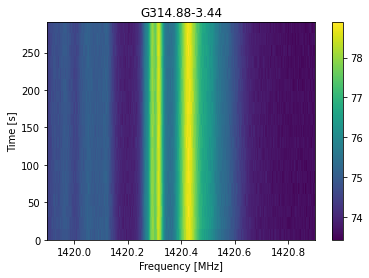

In [48]:
fb.plot_waterfall(logged=True, f_start=1419.9, f_stop=1420.9)

extracting integration 0...


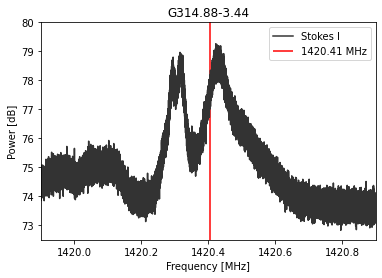

In [64]:
plt.vlines(1420.4057517667, ymin=72, ymax=80, color='red', label='1420.41 MHz')
plt.ylim(72.5,80)
fb.plot_spectrum(logged=True, f_start=1419.9, f_stop=1420.9)